In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

In [2]:
traindata = pd.read_csv(r"C:\Users\vivek\Desktop\sldata\sign_mnist_train.csv")
testdata = pd.read_csv(r"C:\Users\vivek\Desktop\sldata\sign_mnist_test.csv")

In [3]:
traindata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
testdata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
traindata.shape

(27455, 785)

In [8]:
X_train = traindata.drop('label', axis = 1)
X_test = testdata.drop('label', axis = 1)

In [9]:
y_train = traindata['label'].values
y_test = testdata['label'].values

In [10]:
X_train = X_train.values
X_test = X_test.values

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train=np.array(X_train.reshape(-1,28,28,1))
X_test=np.array(X_test.reshape(-1,28,28,1))

In [13]:
X_train.shape

(27455, 28, 28, 1)

In [14]:
from sklearn.preprocessing import LabelBinarizer
lab = LabelBinarizer()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [18]:
train_datagen = ImageDataGenerator(
featurewise_center = False,
samplewise_center = False,
featurewise_std_normalization = False,
samplewise_std_normalization = False,
zca_whitening = False,
rotation_range = 20,
width_shift_range = 0.1,
height_shift_range = 0.1,
zoom_range = 0.1,
horizontal_flip = False,
vertical_flip = False)

In [19]:
train_datagen.fit(X_train)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation = "softmax")
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [25]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [26]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size = 128), epochs = 10, validation_data = (X_test, y_test))

  ...
    to  
  ['...']
Train for 215 steps, validate on 7172 samples
Epoch 1/10
215/215 [==============================] - 33s 153ms/step - loss: 1.0858 - accuracy: 0.6519 - val_loss: 3.6323 - val_accuracy: 0.0584
Epoch 2/10
215/215 [==============================] - 33s 154ms/step - loss: 0.3093 - accuracy: 0.8931 - val_loss: 1.1506 - val_accuracy: 0.5697
Epoch 3/10
215/215 [==============================] - 33s 155ms/step - loss: 0.1695 - accuracy: 0.9429 - val_loss: 0.1478 - val_accuracy: 0.9589
Epoch 4/10
215/215 [==============================] - 31s 144ms/step - loss: 0.1212 - accuracy: 0.9595 - val_loss: 0.2480 - val_accuracy: 0.9186
Epoch 5/10
215/215 [==============================] - 32s 149ms/step - loss: 0.0905 - accuracy: 0.9700 - val_loss: 0.2168 - val_accuracy: 0.9239
Epoch 6/10
215/215 [==============================] - 35s 162ms/step - loss: 0.0748 - accuracy: 0.9749 - val_loss: 0.1175 - val_accuracy: 0.9499
Epoch 7/10
215/215 [==============================] - 34s 1

In [27]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

7172/7172 [==============================] - 2s 278us/sample - loss: 0.1918 - accuracy: 0.9374
Accuracy:0.93739545


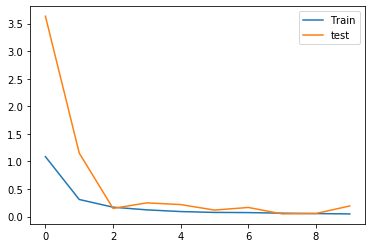

In [28]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['loss'] ,label='Train')
plt.plot(history.epoch,  history.history['val_loss'] ,label='test')
plt.legend()
plt.show()

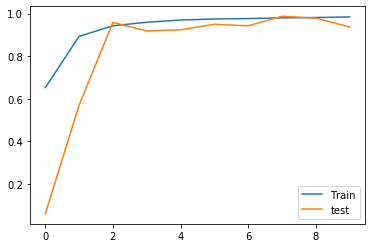

In [29]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['accuracy'] ,label='Train')
plt.plot(history.epoch,  history.history['val_accuracy'] ,label='test')
plt.legend()
plt.show()

In [31]:
model.save('sld.h5')